## The Haar and bi-Haar Bases

In [1]:
from imports import *

We consider first the standard dyadic Haar basis on $2^n$ points. Here we take $n=3$ so we have a tree on eight points.

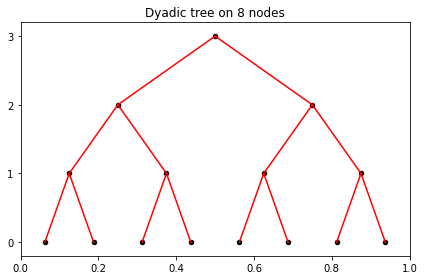

In [2]:
n = 3
t = tree.dyadic_tree(n)
plot_tree(t,title="Dyadic tree on {} nodes".format(2**n))
plt.tight_layout()
plt.show()

We calculate the standard Haar basis for this tree, which consists of eight vectors, pictured below. There is a single node $h_0$ which is constant on all nodes and so the projection of a function on the nodes onto that vector represents the average over all the nodes. Additionally, there is one vector corresponding to each node of the tree. These vectors are supported on the elements of that node and the projection of a function onto each of them represents the difference in averages between the children of each node. 

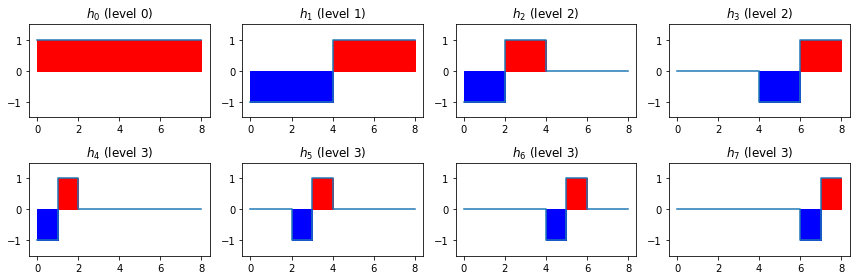

In [4]:
hb,nodes = haar.compute_haar(t,True,"L1")
fig = plt.figure(figsize=(12,4))
for i in range(t.size):
    fig.add_subplot(2,4,i+1)
    x = np.arange(0,t.size+1)
    ypost = np.concatenate([hb[:,i],hb[-1:,i]])
    ypre = np.concatenate([hb[0:1,i],hb[:,i]])
    plt.step(x,ypost,where='post')
    y = np.vstack([ypre,ypost])
    plt.fill_between(x,np.max(y,axis=0),0,
                     where=np.max(y,axis=0)>0.0,color='r')
    plt.fill_between(x,np.min(y,axis=0),0,
                     where=np.min(y,axis=0)<0.0,color='b')
    plt.ylim(-1.5,1.5)
    plt.title("$h_{}$ (level {})".format(i,
                    0 if i==0 else t[nodes[i]].level))
plt.tight_layout()
plt.show()

Next we consider an arbitrary tree, and generate the corresponding Haar-like basis for it.

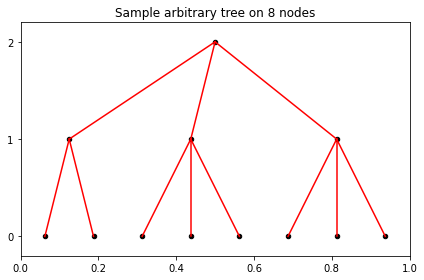

In [5]:
ft = tree.ClusterTreeNode(range(8))
ft.create_subclusters([0,0,1,1,1,2,2,2])
for child in ft.children:
    child.create_subclusters(range(child.size))
ft.make_index()
plot_tree(ft,title="Sample arbitrary tree on {} nodes".format(ft.size))
plt.tight_layout()
plt.show()

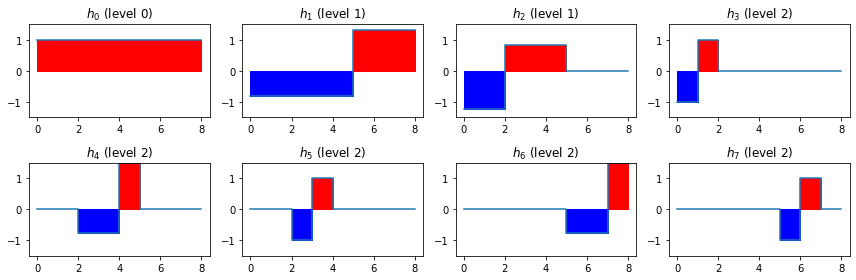

In [6]:
hb, nodes = haar.compute_haar(ft,True,"L1")
fig = plt.figure(figsize=(12,4))
for i in range(ft.size):
    fig.add_subplot(2,4,i+1)
    x = np.arange(0,ft.size+1)
    ypost = np.concatenate([hb[:,i],hb[-1:,i]])
    ypre = np.concatenate([hb[0:1,i],hb[:,i]])
    plt.step(x,ypost,where='post')
    y = np.vstack([ypre,ypost])
    plt.fill_between(x,np.max(y,axis=0),0,
                     where=np.max(y,axis=0)>0.0,color='r')
    plt.fill_between(x,np.min(y,axis=0),0,
                     where=np.min(y,axis=0)<0.0,color='b')
    plt.ylim(-1.5,1.5)
    plt.title("$h_{}$ (level {})".format(i,
                    0 if i==0 else ft[nodes[i]].level))
plt.tight_layout()
plt.show()

Notice that unlike in the dyadic case, the height of the vectors varies based on the ratio of the number of nodes in the $+$ (blue) group and the $-$ (red) group. Also notice that if a node has $k$ children, there are $k-1$ Haar vectors that are supported on that node but no smaller nodes. For example in this sample tree, the root node has three children, and two Haar vectors: $h_1$ and $h_2$.

Next we turn attention to the bi-Haar basis. If there are $m$ nodes on the rows and $n$ nodes on the columns, there are $mn$ vectors in the bi-Haar basis, so in the interests of brevity we will consider simpler trees of 4 and 5 nodes.

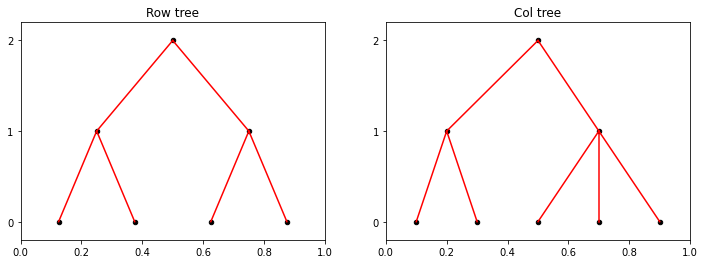

In [7]:
row_tree = tree.dyadic_tree(2)
col_tree = tree.ClusterTreeNode(range(5))
col_tree.create_subclusters([0,0,1,1,1])
for child in col_tree.children:
    child.create_subclusters(range(child.size))
col_tree.make_index()
fig = plt.figure(figsize=(12,4))
fig.add_subplot(1,2,1)
plot_tree(row_tree,title="Row tree")
fig.add_subplot(1,2,2)
plot_tree(col_tree,title="Col tree")
plt.show()

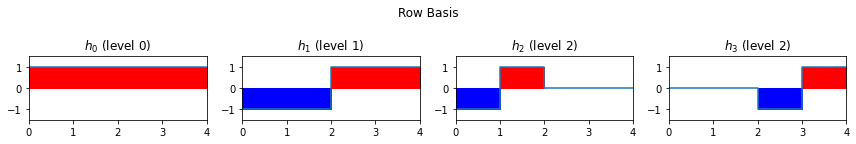

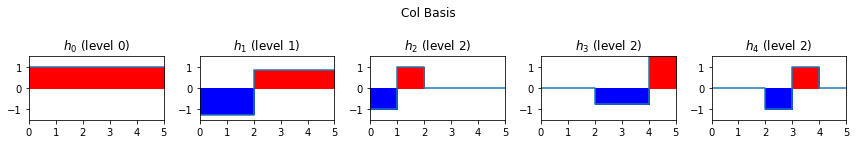

In [9]:
for t,title in [(row_tree,"Row Basis"),(col_tree,"Col Basis")]:
    hb, nodes = haar.compute_haar(t,True,"L1")
    fig = plt.figure(figsize=(12,2))
    fig.suptitle(title)
    for i in range(t.size):
        fig.add_subplot(1,t.size,i+1)
        x = np.arange(0,t.size+1,1)
        ypost = np.concatenate([hb[:,i],hb[-1:,i]])
        ypre = np.concatenate([hb[0:1,i],hb[:,i]])
        plt.step(x,ypost,where='post')
        y = np.vstack([ypre,ypost])
        plt.fill_between(x,np.max(y,axis=0),0,
                         where=np.max(y,axis=0)>0.0,color='r')
        plt.fill_between(x,np.min(y,axis=0),0,
                         where=np.min(y,axis=0)<0.0,color='b')
        plt.ylim(-1.5,1.5)
        plt.xlim(0,t.size)
        plt.xticks(range(t.size+1))
        plt.title("$h_{}$ (level {})".format(i,
                        0 if i==0 else t[nodes[i]].level))
    plt.tight_layout()
    plt.show()

The bi-Haar basis is made of the tensor products of the vectors in the row basis and the vectors in the column basis. Each one of these products forms an $m \times n$ matrix which is supported on the appropriate product folder. We demonstrate the 20 basis vectors that make up the bi-Haar basis for $4 \times 5$ matrices, given these row and column trees:

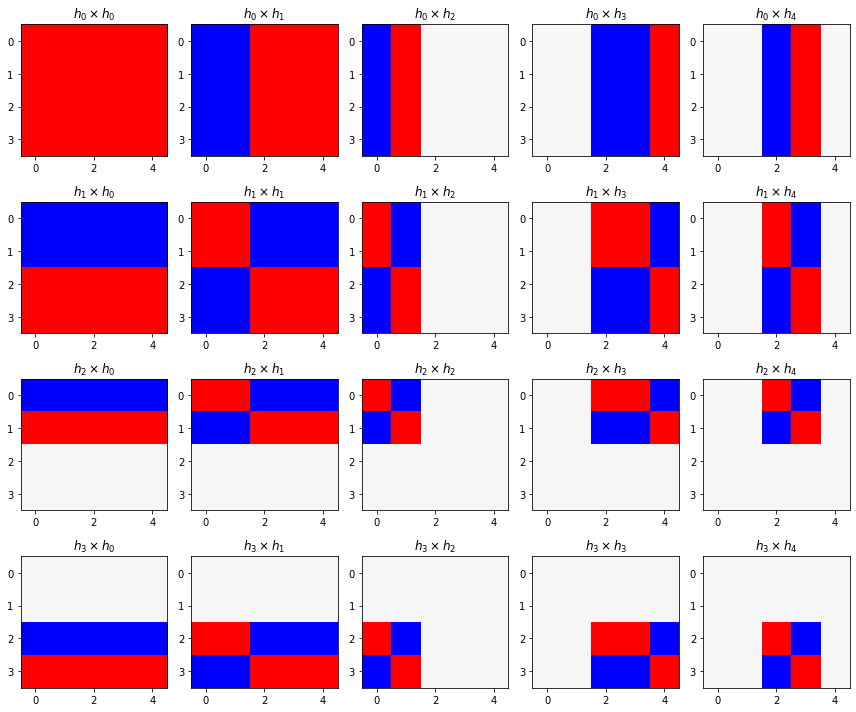

In [10]:
rows,cols = row_tree.size,col_tree.size
row_hb = haar.compute_haar(row_tree,False,"L1")
col_hb = haar.compute_haar(col_tree,False,"L1")
fig = plt.figure(figsize=(12,10))
for i in range(rows):
    for j in range(cols):
        fig.add_subplot(rows,cols,i*cols+j+1)     
        plt.yticks(np.arange(0,rows+1))
        plt.title("$h_{} \\times h_{}$".format(i,j))
        cplot(5.0*np.outer(row_hb[:,i],col_hb[:,j]))
plt.tight_layout()
plt.show()